<a href="https://colab.research.google.com/github/Theodore1771/Data_Science_Project/blob/main/boliga_scraper_wong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from bs4 import BeautifulSoup # used to look through HTML code
import re
import requests # used to string a request
import pandas as pd

In [ ]:
url_base = 'https://www.boliga.dk/salg/resultater?searchTab=1&page={}'

In [ ]:
urls = []

for page_number in range(1, 11):  #we create a loop function to iterate trhough pages 1 to 11
    url = url_base.format(page_number)
    urls.append(url)


In [ ]:
# specify want we want to look for
response = requests.get(url_base)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# we here want to search for the "Boxes" that is present on the webpage. Which means we want the value contained in the 'span' and 'a' class
def parse_single_row(single_row):
    housing_type = single_row.find('span', class_='icon').text.strip()
    address = single_row.find('a', class_='text-primary').text.strip()

    data = single_row.find_all('td', class_='table-col d-print-table-cell text-center')

    latest_purchase_amount = data[0].text.strip()
    latest_purchase_date = data[1].text.strip()
    area = data[2].text.strip()
    number_of_bedrooms = data[3].text.strip()
    year_of_construction = data[4].text.strip()

    return pd.DataFrame({
        'Housing Type': housing_type,
        'Address': [address],
        'Latest Purchase Amount': [latest_purchase_amount],
        'Latest Purchase Date': [latest_purchase_date],
        'Area': [area],
        'Number of Bedrooms': [number_of_bedrooms],
        'Year of Construction': [year_of_construction]
    })

In [ ]:
def parse_one_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    all_rows = soup.find_all('tr', class_='table-row d-print-table-row white-background')
    dfs = []
    for row in all_rows:
        df_row = parse_single_row(row)
        dfs.append(df_row)
    # concatenate all above dataframe into a combined dataframe
    concatenated_df = pd.concat(dfs, ignore_index=True)
    return concatenated_df



In [ ]:

def parse_all_pages():
    dfs = []
    counter = 1
    for url in urls:
        df = parse_one_page(url)
        dfs.append(df)
        print("Page {} completed!".format(counter))
        counter += 1
    concatenated_df = pd.concat(dfs, ignore_index=True)
    return concatenated_df

result = parse_all_pages()

Page 1 completed!
Page 2 completed!
Page 3 completed!
Page 4 completed!
Page 5 completed!
Page 6 completed!
Page 7 completed!
Page 8 completed!
Page 9 completed!
Page 10 completed!


In [ ]:
# Saving as csv for further processing
result.to_csv('results.csv', index=False)

# Data Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Boliga Scraper/results.csv')
df

,Housing Type,Address,Latest Purchase Amount,Latest Purchase Date,Area,Number of Bedrooms,Year of Construction
0,E,"Roskildevej 55, 2. 214 2000 Frederiksberg",3.150.000 kr.,23-04-2024Alm. Salg,67 m² 47.015 kr/m²,2,1972
1,E,"Burmeistersgade 1B, st. th 1429 København K",3.195.000 kr.,23-04-2024Alm. Salg,54 m² 59.167 kr/m²,2,1902
2,V,Egebjergvej 11 4800 Nykøbing F,1.495.000 kr.,23-04-2024Alm. Salg,186 m² 8.038 kr/m²,5,1939
3,E,"Nansensgade 90, 1. tv 1366 København K",5.000.000 kr.,23-04-2024Alm. Salg,133 m² 37.594 kr/m²,4,1876
4,F,Enghaven 9 7900 Nykøbing M,562.500 kr.,23-04-2024Alm. Salg,73 m² 7.705 kr/m²,2,1830
...,...,...,...,...,...,...,...
245,V,Kastanienborgvej 24 2650 Hvidovre,4.525.000 kr.,08-04-2024Alm. Salg,143 m² 31.643 kr/m²,4,1968
246,V,Sundby Alle 15 4800 Nykøbing F,1.650.000 kr.,08-04-2024Alm. Salg,147 m² 11.224 kr/m²,6,1955
247,V,Vallensbæk Strandvej 258 2665 Vallensbæk Strand,5.950.000 kr.,08-04-2024Alm. Salg,160 m² 37.188 kr/m²,6,1958
248,E,"Vejlegårdsparken 12, 1. 18 2665 Vallensbæk Strand",1.300.000 kr.,08-04-2024Alm. Salg,49 m² 26.531 kr/m²,2,1966


In [ ]:
# On webpage the housing type is specified as a single letter. We therefore create a dictonary for mapping
housing_type_mapping = {
    'E': 'Condominium',
    'V': 'Villa',
    'F': 'Holiday Home',
    'R': 'Terraced House',
    'L': 'Country Property'
}

# Appling our dictonary
df['Housing Type'] = df['Housing Type'].map(housing_type_mapping)

df.head()


NameError: name 'df' is not defined

In [ ]:
df["Latest Purchase Amount"]

In [ ]:
# Cleaning our data - since its loaded with unwanted characteristics like kr.
df['Latest Purchase Amount'] = df['Latest Purchase Amount'].str.replace('kr', '').str.replace('.', '').str.replace(' ','')

# # Convert the column to numeric type
df['Latest Purchase Amount'] = df['Latest Purchase Amount'].astype(int)

# Check for corrected values
df.head()

In [ ]:
df.head()

In [ ]:
# Split the "Latest Purchase Date" field into Date & Sale Type
df[['Latest Purchase Date', 'Sale Type']] = df['Latest Purchase Date'].str.extract(r'(\d{2}-\d{2}-\d{4})(.+)')

# Check for corrected values
print(df[['Latest Purchase Date', 'Sale Type']])

In [ ]:
df["Sale Type"].value_counts() # Count the amount of times each sales type occurs

In [ ]:
# Utilizing pandas Datetime format to convert. The extracted date which was split before was in a string format.
df['Latest Purchase Date'] = pd.to_datetime(df['Latest Purchase Date'], format='%d-%m-%Y')

df.head()

In [ ]:
# THe boxes for square metres and prince in danish koren per square metre were not seperated which we do here
df[['Square Metres', 'Price in Danish Krones per Square Metre']] = df['Area'].str.split('  ', expand=True)

# Use regular expressions to obtain the numbers and convert to integer
df['Square Metres'] = df['Square Metres'].str.replace('m²', '').astype(float)
df['Price in Danish Krones per Square Metre'] = df['Price in Danish Krones per Square Metre'].str.replace('kr/m²', '').astype(float)

# Drop 'Area' as not useful for our model
df.drop(columns=['Area'], inplace=True)

# Check if headers are loaded correctly
df.head()

In [ ]:
# Extracting the country code (postal_code)
df['Country Code'] = df['Address'].str.extract(r'(\d{4})')

In [ ]:
df.head()

In [ ]:
# Extracting Year and Month
df['Latest Purchase Date Year'] = df['Latest Purchase Date'].dt.year
df['Latest Purchase Date Month'] = df['Latest Purchase Date'].dt.month

In [ ]:
df.head()

In [ ]:
# Making sure no empty values are present in our dataset
df.isna().sum()

In [ ]:
# saving dataframe as csv
df.to_csv("processed_data.csv", index=False)

### Region and Kommune Mapping (hidden due to long code)
> Add blockquote



In [ ]:
#Reading the csv
df = pd.read_csv('processed_data.csv')
print(df.head())

In [ ]:
#Mapping for Kommunes

import pandas as pd

#Rename "Country Code" to "Post Code" in the df
df.rename(columns={"Country Code": "Post Code"}, inplace=True)

#Create a conditional column called "Kommune"
# Criteria for assigning the Kommune name based on the "Post Code"
def assign_kommune(post_code):
    kommune_mapping = {
    1000: "Kobenhavns Kommune",
    1050: "Kobenhavns Kommune",
    1051: "Kobenhavns Kommune",
    1052: "Kobenhavns Kommune",
    1053: "Kobenhavns Kommune",
    1054: "Kobenhavns Kommune",
    1055: "Kobenhavns Kommune",
    1056: "Kobenhavns Kommune",
    1057: "Kobenhavns Kommune",
    1058: "Kobenhavns Kommune",
    1059: "Kobenhavns Kommune",
    1060: "Kobenhavns Kommune",
    1061: "Kobenhavns Kommune",
    1062: "Kobenhavns Kommune",
    1063: "Kobenhavns Kommune",
    1064: "Kobenhavns Kommune",
    1065: "Kobenhavns Kommune",
    1066: "Kobenhavns Kommune",
    1067: "Kobenhavns Kommune",
    1068: "Kobenhavns Kommune",
    1069: "Kobenhavns Kommune",
    1070: "Kobenhavns Kommune",
    1071: "Kobenhavns Kommune",
    1072: "Kobenhavns Kommune",
    1073: "Kobenhavns Kommune",
    1074: "Kobenhavns Kommune",
    1092: "Kobenhavns Kommune",
    1093: "Kobenhavns Kommune",
    1095: "Kobenhavns Kommune",
    1098: "Kobenhavns Kommune",
    1100: "Kobenhavns Kommune",
    1101: "Kobenhavns Kommune",
    1102: "Kobenhavns Kommune",
    1103: "Kobenhavns Kommune",
    1104: "Kobenhavns Kommune",
    1105: "Kobenhavns Kommune",
    1106: "Kobenhavns Kommune",
    1107: "Kobenhavns Kommune",
    1110: "Kobenhavns Kommune",
    1111: "Kobenhavns Kommune",
    1112: "Kobenhavns Kommune",
    1113: "Kobenhavns Kommune",
    1114: "Kobenhavns Kommune",
    1115: "Kobenhavns Kommune",
    1116: "Kobenhavns Kommune",
    1117: "Kobenhavns Kommune",
    1118: "Kobenhavns Kommune",
    1119: "Kobenhavns Kommune",
    1120: "Kobenhavns Kommune",
    1121: "Kobenhavns Kommune",
    1122: "Kobenhavns Kommune",
    1123: "Kobenhavns Kommune",
    1124: "Kobenhavns Kommune",
    1125: "Kobenhavns Kommune",
    1126: "Kobenhavns Kommune",
    1127: "Kobenhavns Kommune",
    1128: "Kobenhavns Kommune",
    1129: "Kobenhavns Kommune",
    1130: "Kobenhavns Kommune",
    1131: "Kobenhavns Kommune",
    1140: "Kobenhavns Kommune",
    1147: "Kobenhavns Kommune",
    1148: "Kobenhavns Kommune",
    1150: "Kobenhavns Kommune",
    1151: "Kobenhavns Kommune",
    1152: "Kobenhavns Kommune",
    1153: "Kobenhavns Kommune",
    1154: "Kobenhavns Kommune",
    1155: "Kobenhavns Kommune",
    1156: "Kobenhavns Kommune",
    1157: "Kobenhavns Kommune",
    1158: "Kobenhavns Kommune",
    1159: "Kobenhavns Kommune",
    1160: "Kobenhavns Kommune",
    1161: "Kobenhavns Kommune",
    1162: "Kobenhavns Kommune",
    1164: "Kobenhavns Kommune",
    1165: "Kobenhavns Kommune",
    1166: "Kobenhavns Kommune",
    1167: "Kobenhavns Kommune",
    1168: "Kobenhavns Kommune",
    1169: "Kobenhavns Kommune",
    1170: "Kobenhavns Kommune",
    1171: "Kobenhavns Kommune",
    1172: "Kobenhavns Kommune",
    1173: "Kobenhavns Kommune",
    1174: "Kobenhavns Kommune",
    1175: "Kobenhavns Kommune",
    1176: "Kobenhavns Kommune",
    1177: "Kobenhavns Kommune",
    1178: "Kobenhavns Kommune",
    1179: "Kobenhavns Kommune",
    1180: "Kobenhavns Kommune",
    1181: "Kobenhavns Kommune",
    1182: "Kobenhavns Kommune",
    1183: "Kobenhavns Kommune",
    1184: "Kobenhavns Kommune",
    1185: "Kobenhavns Kommune",
    1186: "Kobenhavns Kommune",
    1187: "Kobenhavns Kommune",
    1188: "Kobenhavns Kommune",
    1189: "Kobenhavns Kommune",
    1190: "Kobenhavns Kommune",
    1191: "Kobenhavns Kommune",
    1192: "Kobenhavns Kommune",
    1193: "Kobenhavns Kommune",
    1200: "Kobenhavns Kommune",
    1250: "Kobenhavns Kommune",
    1251: "Kobenhavns Kommune",
    1252: "Kobenhavns Kommune",
    1253: "Kobenhavns Kommune",
    1254: "Kobenhavns Kommune",
    1255: "Kobenhavns Kommune",
    1256: "Kobenhavns Kommune",
    1257: "Kobenhavns Kommune",
    1258: "Kobenhavns Kommune",
    1259: "Kobenhavns Kommune",
    1260: "Kobenhavns Kommune",
    1261: "Kobenhavns Kommune",
    1262: "Kobenhavns Kommune",
    1263: "Kobenhavns Kommune",
    1264: "Kobenhavns Kommune",
    1265: "Kobenhavns Kommune",
    1266: "Kobenhavns Kommune",
    1267: "Kobenhavns Kommune",
    1268: "Kobenhavns Kommune",
    1269: "Kobenhavns Kommune",
    1270: "Kobenhavns Kommune",
    1271: "Kobenhavns Kommune",
    1272: "Kobenhavns Kommune",
    1273: "Kobenhavns Kommune",
    1274: "Kobenhavns Kommune",
    1275: "Kobenhavns Kommune",
    1276: "Kobenhavns Kommune",
    1277: "Kobenhavns Kommune",
    1278: "Kobenhavns Kommune",
    1279: "Kobenhavns Kommune",
    1280: "Kobenhavns Kommune",
    1281: "Kobenhavns Kommune",
    1283: "Kobenhavns Kommune",
    1290: "Kobenhavns Kommune",
    1291: "Kobenhavns Kommune",
    1292: "Kobenhavns Kommune",
    1293: "Kobenhavns Kommune",
    1299: "Kobenhavns Kommune",
    1300: "Kobenhavns Kommune",
    1301: "Kobenhavns Kommune",
    1302: "Kobenhavns Kommune",
    1303: "Kobenhavns Kommune",
    1304: "Kobenhavns Kommune",
    1305: "Kobenhavns Kommune",
    1306: "Kobenhavns Kommune",
    1307: "Kobenhavns Kommune",
    1308: "Kobenhavns Kommune",
    1309: "Kobenhavns Kommune",
    1310: "Kobenhavns Kommune",
    1311: "Kobenhavns Kommune",
    1312: "Kobenhavns Kommune",
    1313: "Kobenhavns Kommune",
    1314: "Kobenhavns Kommune",
    1315: "Kobenhavns Kommune",
    1316: "Kobenhavns Kommune",
    1317: "Kobenhavns Kommune",
    1318: "Kobenhavns Kommune",
    1319: "Kobenhavns Kommune",
    1320: "Kobenhavns Kommune",
    1321: "Kobenhavns Kommune",
    1322: "Kobenhavns Kommune",
    1323: "Kobenhavns Kommune",
    1324: "Kobenhavns Kommune",
    1325: "Kobenhavns Kommune",
    1326: "Kobenhavns Kommune",
    1327: "Kobenhavns Kommune",
    1328: "Kobenhavns Kommune",
    1329: "Kobenhavns Kommune",
    1350: "Kobenhavns Kommune",
    1352: "Kobenhavns Kommune",
    1353: "Kobenhavns Kommune",
    1354: "Kobenhavns Kommune",
    1355: "Kobenhavns Kommune",
    1356: "Kobenhavns Kommune",
    1357: "Kobenhavns Kommune",
    1358: "Kobenhavns Kommune",
    1359: "Kobenhavns Kommune",
    1360: "Kobenhavns Kommune",
    1361: "Kobenhavns Kommune",
    1362: "Kobenhavns Kommune",
    1363: "Kobenhavns Kommune",
    1364: "Kobenhavns Kommune",
    1365: "Kobenhavns Kommune",
    1366: "Kobenhavns Kommune",
    1367: "Kobenhavns Kommune",
    1368: "Kobenhavns Kommune",
    1369: "Kobenhavns Kommune",
    1370: "Kobenhavns Kommune",
    1371: "Kobenhavns Kommune",
    1400: "Kobenhavns Kommune",
    1401: "Kobenhavns Kommune",
    1402: "Kobenhavns Kommune",
    1403: "Kobenhavns Kommune",
    1406: "Kobenhavns Kommune",
    1407: "Kobenhavns Kommune",
    1408: "Kobenhavns Kommune",
    1409: "Kobenhavns Kommune",
    1410: "Kobenhavns Kommune",
    1411: "Kobenhavns Kommune",
    1412: "Kobenhavns Kommune",
    1413: "Kobenhavns Kommune",
    1414: "Kobenhavns Kommune",
    1415: "Kobenhavns Kommune",
    1416: "Kobenhavns Kommune",
    1417: "Kobenhavns Kommune",
    1418: "Kobenhavns Kommune",
    1419: "Kobenhavns Kommune",
    1420: "Kobenhavns Kommune",
    1421: "Kobenhavns Kommune",
    1422: "Kobenhavns Kommune",
    1423: "Kobenhavns Kommune",
    1424: "Kobenhavns Kommune",
    1425: "Kobenhavns Kommune",
    1426: "Kobenhavns Kommune",
    1427: "Kobenhavns Kommune",
    1428: "Kobenhavns Kommune",
    1429: "Kobenhavns Kommune",
    1430: "Kobenhavns Kommune",
    1432: "Kobenhavns Kommune",
    1433: "Kobenhavns Kommune",
    1434: "Kobenhavns Kommune",
    1435: "Kobenhavns Kommune",
    1436: "Kobenhavns Kommune",
    1437: "Kobenhavns Kommune",
    1438: "Kobenhavns Kommune",
    1439: "Kobenhavns Kommune",
    1440: "Kobenhavns Kommune",
    1441: "Kobenhavns Kommune",
    1448: "Kobenhavns Kommune",
    1450: "Kobenhavns Kommune",
    1451: "Kobenhavns Kommune",
    1452: "Kobenhavns Kommune",
    1453: "Kobenhavns Kommune",
    1454: "Kobenhavns Kommune",
    1455: "Kobenhavns Kommune",
    1456: "Kobenhavns Kommune",
    1457: "Kobenhavns Kommune",
    1458: "Kobenhavns Kommune",
    1459: "Kobenhavns Kommune",
    1460: "Kobenhavns Kommune",
    1462: "Kobenhavns Kommune",
    1463: "Kobenhavns Kommune",
    1464: "Kobenhavns Kommune",
    1466: "Kobenhavns Kommune",
    1467: "Kobenhavns Kommune",
    1468: "Kobenhavns Kommune",
    1470: "Kobenhavns Kommune",
    1471: "Kobenhavns Kommune",
    1472: "Kobenhavns Kommune",
    1473: "Kobenhavns Kommune",
    1500: "Kobenhavns Kommune",
    1532: "Tarnby Kommune",
    1533: "Tarnby Kommune",
    1550: "Kobenhavns Kommune",
    1551: "Kobenhavns Kommune",
    1552: "Kobenhavns Kommune",
    1553: "Kobenhavns Kommune",
    1554: "Kobenhavns Kommune",
    1555: "Kobenhavns Kommune",
    1556: "Kobenhavns Kommune",
    1557: "Kobenhavns Kommune",
    1558: "Kobenhavns Kommune",
    1559: "Kobenhavns Kommune",
    1560: "Kobenhavns Kommune",
    1561: "Kobenhavns Kommune",
    1562: "Kobenhavns Kommune",
    1563: "Kobenhavns Kommune",
    1564: "Kobenhavns Kommune",
    1566: "Kobenhavns Kommune",
    1567: "Kobenhavns Kommune",
    1568: "Kobenhavns Kommune",
    1569: "Kobenhavns Kommune",
    1570: "Kobenhavns Kommune",
    1571: "Kobenhavns Kommune",
    1572: "Kobenhavns Kommune",
    1573: "Kobenhavns Kommune",
    1574: "Kobenhavns Kommune",
    1575: "Kobenhavns Kommune",
    1576: "Kobenhavns Kommune",
    1577: "Kobenhavns Kommune",
    1592: "Kobenhavns Kommune",
    1599: "Kobenhavns Kommune",
    1600: "Kobenhavns Kommune",
    1601: "Kobenhavns Kommune",
    1602: "Kobenhavns Kommune",
    1603: "Kobenhavns Kommune",
    1604: "Kobenhavns Kommune",
    1605: "Kobenhavns Kommune",
    1606: "Kobenhavns Kommune",
    1607: "Kobenhavns Kommune",
    1608: "Kobenhavns Kommune",
    1609: "Kobenhavns Kommune",
    1610: "Kobenhavns Kommune",
    1611: "Kobenhavns Kommune",
    1612: "Kobenhavns Kommune",
    1613: "Kobenhavns Kommune",
    1614: "Kobenhavns Kommune",
    1615: "Kobenhavns Kommune",
    1616: "Kobenhavns Kommune",
    1617: "Kobenhavns Kommune",
    1618: "Kobenhavns Kommune",
    1619: "Kobenhavns Kommune",
    1620: "Kobenhavns Kommune",
    1621: "Kobenhavns Kommune",
    1622: "Kobenhavns Kommune",
    1623: "Kobenhavns Kommune",
    1624: "Kobenhavns Kommune",
    1630: "Kobenhavns Kommune",
    1631: "Kobenhavns Kommune",
    1632: "Kobenhavns Kommune",
    1633: "Kobenhavns Kommune",
    1634: "Kobenhavns Kommune",
    1635: "Kobenhavns Kommune",
    1650: "Kobenhavns Kommune",
    1651: "Kobenhavns Kommune",
    1652: "Kobenhavns Kommune",
    1653: "Kobenhavns Kommune",
    1654: "Kobenhavns Kommune",
    1655: "Kobenhavns Kommune",
    1656: "Kobenhavns Kommune",
    1657: "Kobenhavns Kommune",
    1658: "Kobenhavns Kommune",
    1659: "Kobenhavns Kommune",
    1660: "Kobenhavns Kommune",
    1661: "Kobenhavns Kommune",
    1662: "Kobenhavns Kommune",
    1663: "Kobenhavns Kommune",
    1664: "Kobenhavns Kommune",
    1665: "Kobenhavns Kommune",
    1666: "Kobenhavns Kommune",
    1667: "Kobenhavns Kommune",
    1668: "Kobenhavns Kommune",
    1669: "Kobenhavns Kommune",
    1670: "Kobenhavns Kommune",
    1671: "Kobenhavns Kommune",
    1672: "Kobenhavns Kommune",
    1673: "Kobenhavns Kommune",
    1674: "Kobenhavns Kommune",
    1675: "Kobenhavns Kommune",
    1676: "Kobenhavns Kommune",
    1677: "Kobenhavns Kommune",
    1699: "Kobenhavns Kommune",
    1700: "Kobenhavns Kommune",
    1701: "Kobenhavns Kommune",
    1702: "Kobenhavns Kommune",
    1703: "Kobenhavns Kommune",
    1704: "Kobenhavns Kommune",
    1705: "Kobenhavns Kommune",
    1706: "Kobenhavns Kommune",
    1707: "Kobenhavns Kommune",
    1708: "Kobenhavns Kommune",
    1709: "Kobenhavns Kommune",
    1710: "Kobenhavns Kommune",
    1711: "Kobenhavns Kommune",
    1712: "Kobenhavns Kommune",
    1714: "Kobenhavns Kommune",
    1715: "Kobenhavns Kommune",
    1716: "Kobenhavns Kommune",
    1717: "Kobenhavns Kommune",
    1718: "Kobenhavns Kommune",
    1719: "Kobenhavns Kommune",
    1720: "Kobenhavns Kommune",
    1721: "Kobenhavns Kommune",
    1722: "Kobenhavns Kommune",
    1723: "Kobenhavns Kommune",
    1724: "Kobenhavns Kommune",
    1725: "Kobenhavns Kommune",
    1726: "Kobenhavns Kommune",
    1727: "Kobenhavns Kommune",
    1728: "Kobenhavns Kommune",
    1729: "Kobenhavns Kommune",
    1730: "Kobenhavns Kommune",
    1731: "Kobenhavns Kommune",
    1732: "Kobenhavns Kommune",
    1733: "Kobenhavns Kommune",
    1734: "Kobenhavns Kommune",
    1735: "Kobenhavns Kommune",
    1736: "Kobenhavns Kommune",
    1737: "Kobenhavns Kommune",
    1738: "Kobenhavns Kommune",
    1739: "Kobenhavns Kommune",
    1749: "Kobenhavns Kommune",
    1750: "Kobenhavns Kommune",
    1751: "Kobenhavns Kommune",
    1752: "Kobenhavns Kommune",
    1753: "Kobenhavns Kommune",
    1754: "Kobenhavns Kommune",
    1755: "Kobenhavns Kommune",
    1756: "Kobenhavns Kommune",
    1757: "Kobenhavns Kommune",
    1758: "Kobenhavns Kommune",
    1759: "Kobenhavns Kommune",
    1760: "Kobenhavns Kommune",
    1761: "Kobenhavns Kommune",
    1762: "Kobenhavns Kommune",
    1763: "Kobenhavns Kommune",
    1764: "Kobenhavns Kommune",
    1765: "Kobenhavns Kommune",
    1766: "Kobenhavns Kommune",
    1770: "Kobenhavns Kommune",
    1771: "Kobenhavns Kommune",
    1772: "Kobenhavns Kommune",
    1773: "Kobenhavns Kommune",
    1774: "Kobenhavns Kommune",
    1775: "Kobenhavns Kommune",
    1777: "Kobenhavns Kommune",
    1780: "Kobenhavns Kommune",
    1785: "Kobenhavns Kommune",
    1786: "Kobenhavns Kommune",
    1787: "Kobenhavns Kommune",
    1790: "Kobenhavns Kommune",
    1799: "Kobenhavns Kommune",
    1800: "Frederiksberg Kommune",
    1801: "Frederiksberg Kommune",
    1802: "Frederiksberg Kommune",
    1803: "Frederiksberg Kommune",
    1804: "Frederiksberg Kommune",
    1805: "Frederiksberg Kommune",
    1806: "Frederiksberg Kommune",
    1807: "Frederiksberg Kommune",
    1808: "Frederiksberg Kommune",
    1809: "Frederiksberg Kommune",
    1810: "Kobenhavns Kommune",
    1810: "Frederiksberg Kommune",
    1811: "Frederiksberg Kommune",
    1812: "Frederiksberg Kommune",
    1813: "Frederiksberg Kommune",
    1814: "Frederiksberg Kommune",
    1815: "Frederiksberg Kommune",
    1816: "Frederiksberg Kommune",
    1817: "Frederiksberg Kommune",
    1818: "Frederiksberg Kommune",
    1819: "Frederiksberg Kommune",
    1820: "Frederiksberg Kommune",
    1822: "Frederiksberg Kommune",
    1823: "Frederiksberg Kommune",
    1824: "Frederiksberg Kommune",
    1825: "Frederiksberg Kommune",
    1826: "Frederiksberg Kommune",
    1827: "Frederiksberg Kommune",
    1828: "Frederiksberg Kommune",
    1829: "Frederiksberg Kommune",
    1850: "Frederiksberg Kommune",
    1851: "Frederiksberg Kommune",
    1852: "Frederiksberg Kommune",
    1853: "Frederiksberg Kommune",
    1854: "Frederiksberg Kommune",
    1855: "Frederiksberg Kommune",
    1856: "Frederiksberg Kommune",
    1857: "Frederiksberg Kommune",
    1860: "Frederiksberg Kommune",
    1861: "Frederiksberg Kommune",
    1862: "Frederiksberg Kommune",
    1863: "Frederiksberg Kommune",
    1864: "Frederiksberg Kommune",
    1865: "Frederiksberg Kommune",
    1866: "Frederiksberg Kommune",
    1867: "Frederiksberg Kommune",
    1868: "Frederiksberg Kommune",
    1870: "Frederiksberg Kommune",
    1871: "Frederiksberg Kommune",
    1872: "Frederiksberg Kommune",
    1873: "Frederiksberg Kommune",
    1874: "Frederiksberg Kommune",
    1875: "Frederiksberg Kommune",
    1876: "Frederiksberg Kommune",
    1877: "Frederiksberg Kommune",
    1878: "Frederiksberg Kommune",
    1879: "Frederiksberg Kommune",
    1900: "Frederiksberg Kommune",
    1901: "Frederiksberg Kommune",
    1902: "Frederiksberg Kommune",
    1903: "Frederiksberg Kommune",
    1904: "Frederiksberg Kommune",
    1905: "Frederiksberg Kommune",
    1906: "Frederiksberg Kommune",
    1908: "Frederiksberg Kommune",
    1909: "Frederiksberg Kommune",
    1910: "Frederiksberg Kommune",
    1911: "Frederiksberg Kommune",
    1912: "Frederiksberg Kommune",
    1913: "Frederiksberg Kommune",
    1914: "Frederiksberg Kommune",
    1915: "Frederiksberg Kommune",
    1916: "Frederiksberg Kommune",
    1917: "Frederiksberg Kommune",
    1920: "Frederiksberg Kommune",
    1921: "Frederiksberg Kommune",
    1922: "Frederiksberg Kommune",
    1923: "Frederiksberg Kommune",
    1924: "Frederiksberg Kommune",
    1925: "Frederiksberg Kommune",
    1926: "Frederiksberg Kommune",
    1927: "Frederiksberg Kommune",
    1928: "Frederiksberg Kommune",
    1950: "Frederiksberg Kommune",
    1951: "Frederiksberg Kommune",
    1952: "Frederiksberg Kommune",
    1953: "Frederiksberg Kommune",
    1954: "Frederiksberg Kommune",
    1955: "Frederiksberg Kommune",
    1956: "Frederiksberg Kommune",
    1957: "Frederiksberg Kommune",
    1958: "Frederiksberg Kommune",
    1959: "Frederiksberg Kommune",
    1960: "Frederiksberg Kommune",
    1961: "Frederiksberg Kommune",
    1962: "Frederiksberg Kommune",
    1963: "Frederiksberg Kommune",
    1964: "Frederiksberg Kommune",
    1965: "Frederiksberg Kommune",
    1966: "Frederiksberg Kommune",
    1967: "Frederiksberg Kommune",
    1970: "Frederiksberg Kommune",
    1971: "Frederiksberg Kommune",
    1972: "Frederiksberg Kommune",
    1973: "Frederiksberg Kommune",
    1974: "Frederiksberg Kommune",
    2000: "Kobenhavns Kommune",
    2000: "Frederiksberg Kommune",
    2100: "Kobenhavns Kommune",
    2150: "Kobenhavns Kommune",
    2200: "Kobenhavns Kommune",
    2200: "Kobenhavns Kommune",
    2200: "Frederiksberg Kommune",
    2300: "Kobenhavns Kommune",
    2300: "Taarnby Kommune",
    2400: "Kobenhavns Kommune",
    2450: "Kobenhavns Kommune",
    2500: "Kobenhavns Kommune",
    2500: "Frederiksberg Kommune",
    2600: "Glostrup Kommune",
    2600: "Albertslund Kommune",
    2605: "Broendby Kommune",
    2610: "Kobenhavns Kommune",
    2610: "Hvidovre Kommune",
    2610: "Roedovre Kommune",
    2620: "Broendby Kommune",
    2620: "Albertslund Kommune",
    2625: "Vallensbaek Kommune",
    2630: "Hoeje-Taastrup Kommune",
    2635: "Ishoej Kommune",
    2640: "Hoeje-Taastrup Kommune",
    2640: "Ishoej Kommune",
    2640: "Greve Kommune",
    2640: "Roskilde Kommune",
    2650: "Broendby Kommune",
    2650: "Hvidovre Kommune",
    2660: "Broendby Kommune",
    2660: "Hvidovre Kommune",
    2665: "Vallensbaek Kommune",
    2670: "Greve Kommune",
    2680: "Solroed Kommune",
    2690: "Greve Kommune",
    2690: "Solroed Kommune",
    2700: "Kobenhavns Kommune",
    2720: "Kobenhavns Kommune",
    2720: "Frederiksberg Kommune",
    2730: "Ballerup Kommune",
    2730: "Gladsaxe Kommune",
    2730: "Herlev Kommune",
    2740: "Ballerup Kommune",
    2740: "Herlev Kommune",
    2750: "Ballerup Kommune",
    2750: "Albertslund Kommune",
    2750: "Egedal Kommune",
    2760: "Ballerup Kommune",
    2765: "Egedal Kommune",
    2770: "Kobenhavns Kommune",
    2770: "Taarnby Kommune",
    2791: "Dragoer Kommune",
    2791: "Taarnby Kommune",
    2800: "Gentofte Kommune",
    2800: "Gladsaxe Kommune",
    2800: "Lyngby-Taarbaek Kommune",
    2800: "Rudersdal Kommune",
    2820: "Gentofte Kommune",
    2820: "Gladsaxe Kommune",
    2830: "Lyngby-Taarbaek Kommune",
    2830: "Rudersdal Kommune",
    2840: "Lyngby-Taarbaek Kommune",
    2840: "Rudersdal Kommune",
    2850: "Rudersdal Kommune",
    2860: "Kobenhavns Kommune",
    2860: "Gladsaxe Kommune",
    2870: "Gentofte Kommune",
    2880: "Gladsaxe Kommune",
    2880: "Herlev Kommune",
    2880: "Fureso Kommune",
    2900: "Kobenhavns Kommune",
    2900: "Gentofte Kommune",
    2920: "Gentofte Kommune",
    2930: "Gentofte Kommune",
    2930: "Lyngby-Taarbaek Kommune",
    2942: "Rudersdal Kommune",
    2950: "Hoersholm Kommune",
    2950: "Rudersdal Kommune",
    2960: "Hoersholm Kommune",
    2970: "Fredensborg Kommune",
    2970: "Hoersholm Kommune",
    2970: "Rudersdal Kommune",
    2980: "Fredensborg Kommune",
    2980: "Hoersholm Kommune",
    2990: "Fredensborg Kommune",
    3000: "Helsingor Kommune",
    3050: "Fredensborg Kommune",
    3060: "Fredensborg Kommune",
    3060: "Helsingor Kommune",
    3070: "Helsingor Kommune",
    3080: "Helsingor Kommune",
    3100: "Helsingor Kommune",
    3100: "Gribskov Kommune",
    3120: "Gribskov Kommune",
    3140: "Helsingor Kommune",
    3150: "Helsingor Kommune",
    3200: "Hillerod Kommune",
    3200: "Gribskov Kommune",
    3210: "Gribskov Kommune",
    3220: "Gribskov Kommune",
    3230: "Helsingor Kommune",
    3230: "Hillerod Kommune",
    3230: "Gribskov Kommune",
    3250: "Gribskov Kommune",
    3300: "Halsnaes Kommune",
    3300: "Gribskov Kommune",
    3310: "Hillerod Kommune",
    3310: "Halsnaes Kommune",
    3320: "Hillerod Kommune",
    3320: "Halsnaes Kommune",
    3330: "Hillerod Kommune",
    3360: "Halsnaes Kommune",
    3370: "Halsnaes Kommune",
    3390: "Halsnaes Kommune",
    3400: "Allerod Kommune",
    3400: "Fredensborg Kommune",
    3400: "Hillerod Kommune",
    3450: "Allerod Kommune",
    3450: "Fredensborg Kommune",
    3450: "Hillerod Kommune",
    3460: "Fureso Kommune",
    3460: "Allerod Kommune",
    3460: "Rudersdal Kommune",
    3480: "Fredensborg Kommune",
    3480: "Helsingor Kommune",
    3480: "Hillerod Kommune",
    3490: "Fredensborg Kommune",
    3490: "Helsingor Kommune",
    3500: "Ballerup Kommune",
    3500: "Gladsaxe Kommune",
    3500: "Lyngby-Taarbaek Kommune",
    3500: "Fureso Kommune",
    3500: "Egedal Kommune",
    3520: "Fureso Kommune",
    3520: "Allerod Kommune",
    3520: "Egedal Kommune",
    3540: "Fureso Kommune",
    3540: "Allerod Kommune",
    3540: "Hillerod Kommune",
    3540: "Egedal Kommune",
    3550: "Allerod Kommune",
    3550: "Hillerod Kommune",
    3550: "Egedal Kommune",
    3550: "Frederikssund Kommune",
    3600: "Hillerod Kommune",
    3600: "Frederikssund Kommune",
    3600: "Halsnaes Kommune",
    3630: "Frederikssund Kommune",
    3650: "Egedal Kommune",
    3660: "Egedal Kommune",
    3670: "Egedal Kommune",
    3670: "Roskilde Kommune",
    3700: "Bornholm Kommune",
    3720: "Bornholm Kommune",
    3730: "Bornholm Kommune",
    3740: "Bornholm Kommune",
    3751: "Bornholm Kommune",
    3760: "Bornholm Kommune",
    3760: "Christiansoe",
    3770: "Bornholm Kommune",
    3782: "Bornholm Kommune",
    3790: "Bornholm Kommune",
    4000: "Hoeje-Taastrup Kommune",
    4000: "Roskilde Kommune",
    4000: "Lejre Kommune",
    4030: "Greve Kommune",
    4030: "Roskilde Kommune",
    4040: "Roskilde Kommune",
    4050: "Frederikssund Kommune",
    4060: "Lejre Kommune",
    4070: "Lejre Kommune",
    4100: "Koege Kommune",
    4100: "Holbaek Kommune",
    4100: "Faxe Kommune",
    4100: "Ringsted Kommune",
    4100: "Soroe Kommune",
    4130: "Koege Kommune",
    4130: "Roskilde Kommune",
    4140: "Koege Kommune",
    4140: "Roskilde Kommune",
    4140: "Ringsted Kommune",
    4160: "Faxe Kommune",
    4160: "Naestved Kommune",
    4171: "Naestved Kommune",
    4173: "Ringsted Kommune",
    4173: "Soroe Kommune",
    4174: "Koege Kommune",
    4174: "Ringsted Kommune",
    4180: "Ringsted Kommune",
    4180: "Slagelse Kommune",
    4180: "Soroe Kommune",
    4190: "Slagelse Kommune",
    4190: "Soroe Kommune",
    4200: "Kalundborg Kommune",
    4200: "Slagelse Kommune",
    4200: "Soroe Kommune",
    4200: "Naestved Kommune",
    4220: "Slagelse Kommune",
    4230: "Slagelse Kommune",
    4241: "Slagelse Kommune",
    4242: "Slagelse Kommune",
    4243: "Slagelse Kommune",
    4243: "Naestved Kommune",
    4244: "Slagelse Kommune",
    4245: "Slagelse Kommune",
    4250: "Slagelse Kommune",
    4250: "Naestved Kommune",
    4261: "Slagelse Kommune",
    4261: "Naestved Kommune",
    4262: "Slagelse Kommune",
    4262: "Naestved Kommune",
    4270: "Kalundborg Kommune",
    4270: "Slagelse Kommune",
    4281: "Kalundborg Kommune",
    4291: "Kalundborg Kommune",
    4291: "Soroe Kommune",
    4293: "Kalundborg Kommune",
    4293: "Soroe Kommune",
    4295: "Holbaek Kommune",
    4295: "Soroe Kommune",
    4296: "Holbaek Kommune",
    4296: "Soroe Kommune",
    4300: "Holbaek Kommune",
    4305: "Holbaek Kommune",
    4320: "Koege Kommune",
    4320: "Roskilde Kommune",
    4320: "Lejre Kommune",
    4330: "Holbaek Kommune",
    4330: "Ringsted Kommune",
    4330: "Lejre Kommune",
    4340: "Holbaek Kommune",
    4340: "Lejre Kommune",
    4350: "Holbaek Kommune",
    4360: "Holbaek Kommune",
    4360: "Ringsted Kommune",
    4370: "Holbaek Kommune",
    4370: "Ringsted Kommune",
    4370: "Soroe Kommune",
    4390: "Holbaek Kommune",
    4400: "Kalundborg Kommune",
    4420: "Holbaek Kommune",
    4440: "Holbaek Kommune",
    4450: "Holbaek Kommune",
    4450: "Kalundborg Kommune",
    4460: "Holbaek Kommune",
    4460: "Kalundborg Kommune",
    4470: "Holbaek Kommune",
    4470: "Kalundborg Kommune",
    4480: "Kalundborg Kommune",
    4490: "Kalundborg Kommune",
    4500: "Odsherred Kommune",
    4520: "Holbaek Kommune",
    4532: "Holbaek Kommune",
    4534: "Odsherred Kommune",
    4534: "Kalundborg Kommune",
    4540: "Odsherred Kommune",
    4550: "Odsherred Kommune",
    4560: "Odsherred Kommune",
    4571: "Odsherred Kommune",
    4572: "Odsherred Kommune",
    4573: "Odsherred Kommune",
    4581: "Odsherred Kommune",
    4583: "Odsherred Kommune",
    4591: "Odsherred Kommune",
    4591: "Kalundborg Kommune",
    4592: "Kalundborg Kommune",
    4593: "Kalundborg Kommune",
    4600: "Koege Kommune",
    4600: "Holbaek Kommune",
    4600: "Stevns Kommune",
    4621: "Roskilde Kommune",
    4622: "Roskilde Kommune",
    4622: "Solroed Kommune",
    4623: "Koege Kommune",
    4623: "Roskilde Kommune",
    4623: "Solroed Kommune",
    4632: "Koege Kommune",
    4640: "Faxe Kommune",
    4640: "Naestved Kommune",
    4652: "Faxe Kommune",
    4652: "Stevns Kommune",
    4653: "Faxe Kommune",
    4653: "Stevns Kommune",
    4654: "Faxe Kommune",
    4660: "Stevns Kommune",
    4671: "Stevns Kommune",
    4672: "Stevns Kommune",
    4673: "Stevns Kommune",
    4681: "Koege Kommune",
    4682: "Koege Kommune",
    4682: "Faxe Kommune",
    4682: "Stevns Kommune",
    4683: "Faxe Kommune",
    4683: "Naestved Kommune",
    4684: "Faxe Kommune",
    4684: "Naestved Kommune",
    4690: "Faxe Kommune",
    4690: "Ringsted Kommune",
    4690: "Naestved Kommune",
    4700: "Naestved Kommune",
    4720: "Vordingborg Kommune",
    4733: "Faxe Kommune",
    4733: "Naestved Kommune",
    4733: "Vordingborg Kommune",
    4735: "Vordingborg Kommune",
    4736: "Naestved Kommune",
    4750: "Naestved Kommune",
    4750: "Vordingborg Kommune",
    4760: "Vordingborg Kommune",
    4771: "Vordingborg Kommune",
    4772: "Vordingborg Kommune",
    4773: "Vordingborg Kommune",
    4780: "Vordingborg Kommune",
    4791: "Vordingborg Kommune",
    4792: "Vordingborg Kommune",
    4793: "Vordingborg Kommune",
    4800: "Guldborgsund Kommune",
    4840: "Guldborgsund Kommune",
    4850: "Guldborgsund Kommune",
    4862: "Guldborgsund Kommune",
    4863: "Guldborgsund Kommune",
    4871: "Guldborgsund Kommune",
    4872: "Guldborgsund Kommune",
    4873: "Guldborgsund Kommune",
    4874: "Guldborgsund Kommune",
    4880: "Guldborgsund Kommune",
    4891: "Guldborgsund Kommune",
    4892: "Guldborgsund Kommune",
    4894: "Lolland Kommune",
    4894: "Guldborgsund Kommune",
    4895: "Lolland Kommune",
    4900: "Lolland Kommune",
    4912: "Lolland Kommune",
    4913: "Lolland Kommune",
    4920: "Lolland Kommune",
    4930: "Lolland Kommune",
    4930: "Guldborgsund Kommune",
    4941: "Lolland Kommune",
    4942: "Lolland Kommune",
    4943: "Lolland Kommune",
    4944: "Lolland Kommune",
    4945: "Lolland Kommune",
    4951: "Lolland Kommune",
    4952: "Lolland Kommune",
    4953: "Lolland Kommune",
    4960: "Lolland Kommune",
    4970: "Lolland Kommune",
    4983: "Lolland Kommune",
    4990: "Guldborgsund Kommune",
    5000: "Odense Kommune",
    5200: "Odense Kommune",
    5210: "Odense Kommune",
    5220: "Odense Kommune",
    5230: "Odense Kommune",
    5240: "Odense Kommune",
    5250: "Odense Kommune",
    5260: "Odense Kommune",
    5270: "Odense Kommune",
    5270: "Nordfyns Kommune",
    5290: "Kerteminde Kommune",
    5300: "Kerteminde Kommune",
    5320: "Odense Kommune",
    5330: "Kerteminde Kommune",
    5330: "Odense Kommune",
    5350: "Kerteminde Kommune",
    5370: "Kerteminde Kommune",
    5380: "Kerteminde Kommune",
    5390: "Kerteminde Kommune",
    5400: "Nordfyns Kommune",
    5450: "Nordfyns Kommune",
    5462: "Nordfyns Kommune",
    5463: "Middelfart Kommune",
    5464: "Middelfart Kommune",
    5466: "Middelfart Kommune",
    5471: "Nordfyns Kommune",
    5474: "Nordfyns Kommune",
    5485: "Nordfyns Kommune",
    5491: "Odense Kommune",
    5491: "Nordfyns Kommune",
    5492: "Assens Kommune",
    5492: "Odense Kommune",
    5492: "Nordfyns Kommune",
    5500: "Middelfart Kommune",
    5540: "Kerteminde Kommune",
    5540: "Nyborg Kommune",
    5550: "Faaborg-Midtfyn Kommune",
    5550: "Kerteminde Kommune",
    5550: "Nyborg Kommune",
    5560: "Middelfart Kommune",
    5560: "Assens Kommune",
    5560: "Nordfyns Kommune",
    5580: "Middelfart Kommune",
    5591: "Middelfart Kommune",
    5592: "Middelfart Kommune",
    5600: "Faaborg-Midtfyn Kommune",
    5601: "Faaborg-Midtfyn Kommune",
    5602: "Faaborg-Midtfyn Kommune",
    5603: "Faaborg-Midtfyn Kommune",
    5610: "Assens Kommune",
    5620: "Assens Kommune",
    5631: "Assens Kommune",
    5642: "Assens Kommune",
    5642: "Faaborg-Midtfyn Kommune",
    5672: "Faaborg-Midtfyn Kommune",
    5683: "Assens Kommune",
    5690: "Assens Kommune",
    5700: "Svendborg Kommune",
    5750: "Faaborg-Midtfyn Kommune",
    5762: "Faaborg-Midtfyn Kommune",
    5762: "Svendborg Kommune",
    5771: "Faaborg-Midtfyn Kommune",
    5771: "Svendborg Kommune",
    5772: "Faaborg-Midtfyn Kommune",
    5772: "Svendborg Kommune",
    5792: "Faaborg-Midtfyn Kommune",
    5800: "Nyborg Kommune",
    5853: "Faaborg-Midtfyn Kommune",
    5853: "Nyborg Kommune",
    5854: "Faaborg-Midtfyn Kommune",
    5854: "Svendborg Kommune",
    5856: "Faaborg-Midtfyn Kommune",
    5863: "Faaborg-Midtfyn Kommune",
    5863: "Kerteminde Kommune",
    5871: "Nyborg Kommune",
    5874: "Nyborg Kommune",
    5874: "Svendborg Kommune",
    5881: "Svendborg Kommune",
    5882: "Svendborg Kommune",
    5883: "Svendborg Kommune",
    5884: "Svendborg Kommune",
    5892: "Svendborg Kommune",
    5900: "Langeland Kommune",
    5932: "Langeland Kommune",
    5935: "Langeland Kommune",
    5943: "Langeland Kommune",
    5953: "Langeland Kommune",
    5960: "Aeroe Kommune",
    5965: "Aeroe Kommune",
    5970: "Aeroe Kommune",
    5985: "Aeroe Kommune",
    6000: "Kolding Kommune",
    6040: "Kolding Kommune",
    6040: "Vejle Kommune",
    6051: "Kolding Kommune",
    6052: "Kolding Kommune",
    6052: "Vejle Kommune",
    6064: "Kolding Kommune",
    6070: "Haderslev Kommune",
    6070: "Kolding Kommune",
    6091: "Kolding Kommune",
    6092: "Kolding Kommune",
    6093: "Kolding Kommune",
    6094: "Haderslev Kommune",
    6094: "Kolding Kommune",
    6100: "Haderslev Kommune",
    6100: "Kolding Kommune",
    6200: "Aabenraa Kommune",
    6210: "Aabenraa Kommune",
    6230: "Aabenraa Kommune",
    6240: "Toender Kommune",
    6261: "Toender Kommune",
    6270: "Toender Kommune",
    6280: "Toender Kommune",
    6300: "Soenderborg Kommune",
    6310: "Soenderborg Kommune",
    6320: "Soenderborg Kommune",
    6330: "Aabenraa Kommune",
    6340: "Aabenraa Kommune",
    6360: "Aabenraa Kommune",
    6372: "Aabenraa Kommune",
    6392: "Aabenraa Kommune",
    6400: "Soenderborg Kommune",
    6430: "Soenderborg Kommune",
    6430: "Kolding Kommune",
    6440: "Soenderborg Kommune",
    6470: "Soenderborg Kommune",
    6500: "Haderslev Kommune",
    6510: "Haderslev Kommune",
    6520: "Haderslev Kommune",
    6520: "Toender Kommune",
    6534: "Haderslev Kommune",
    6534: "Toender Kommune",
    6534: "Aabenraa Kommune",
    6535: "Toender Kommune",
    6541: "Haderslev Kommune",
    6541: "Toender Kommune",
    6560: "Haderslev Kommune",
    6560: "Kolding Kommune",
    6580: "Kolding Kommune",
    6600: "Vejen Kommune",
    6621: "Vejen Kommune",
    6622: "Vejen Kommune",
    6623: "Billund Kommune",
    6623: "Vejen Kommune",
    6623: "Vejle Kommune",
    6630: "Haderslev Kommune",
    6630: "Vejen Kommune",
    6640: "Kolding Kommune",
    6650: "Vejen Kommune",
    6660: "Vejen Kommune",
    6670: "Esbjerg Kommune",
    6670: "Vejen Kommune",
    6682: "Billund Kommune",
    6682: "Varde Kommune",
    6682: "Vejen Kommune",
    6683: "Esbjerg Kommune",
    6683: "Vejen Kommune",
    6690: "Esbjerg Kommune",
    6690: "Vejen Kommune",
    6700: "Esbjerg Kommune",
    6705: "Esbjerg Kommune",
    6710: "Esbjerg Kommune",
    6715: "Esbjerg Kommune",
    6720: "Fano Kommune",
    6731: "Esbjerg Kommune",
    6740: "Esbjerg Kommune",
    6752: "Vejen Kommune",
    6753: "Varde Kommune",
    6753: "Vejen Kommune",
    6760: "Esbjerg Kommune",
    6771: "Esbjerg Kommune",
    6780: "Toender Kommune",
    6792: "Toender Kommune",
    6800: "Varde Kommune",
    6818: "Esbjerg Kommune",
    6818: "Varde Kommune",
    6823: "Billund Kommune",
    6823: "Varde Kommune",
    6830: "Ringkoebing-Skjern Kommune",
    6830: "Varde Kommune",
    6840: "Varde Kommune",
    6851: "Varde Kommune",
    6852: "Varde Kommune",
    6853: "Varde Kommune",
    6854: "Varde Kommune",
    6855: "Varde Kommune",
    6857: "Varde Kommune",
    6862: "Varde Kommune",
    6870: "Ringkoebing-Skjern Kommune",
    6870: "Varde Kommune",
    6880: "Ringkoebing-Skjern Kommune",
    6880: "Varde Kommune",
    6893: "Ringkoebing-Skjern Kommune",
    6900: "Ringkoebing-Skjern Kommune",
    6920: "Ringkoebing-Skjern Kommune",
    6933: "Herning Kommune",
    6933: "Ringkoebing-Skjern Kommune",
    6940: "Ringkoebing-Skjern Kommune",
    6950: "Ringkoebing-Skjern Kommune",
    6960: "Ringkoebing-Skjern Kommune",
    6971: "Ringkoebing-Skjern Kommune",
    6973: "Herning Kommune",
    6973: "Ringkoebing-Skjern Kommune",
    6980: "Ringkoebing-Skjern Kommune",
    6990: "Herning Kommune",
    6990: "Holstebro Kommune",
    6990: "Lemvig Kommune",
    6990: "Ringkoebing-Skjern Kommune",
    7000: "Fredericia Kommune",
    7000: "Vejle Kommune",
    7007: "Fredericia Kommune",
    7080: "Vejle Kommune",
    7100: "Hedensted Kommune",
    7100: "Vejle Kommune",
    7120: "Hedensted Kommune",
    7120: "Vejle Kommune",
    7130: "Hedensted Kommune",
    7140: "Hedensted Kommune",
    7150: "Hedensted Kommune",
    7160: "Hedensted Kommune",
    7160: "Vejle Kommune",
    7171: "Hedensted Kommune",
    7173: "Vejle Kommune",
    7182: "Vejle Kommune",
    7183: "Vejle Kommune",
    7184: "Vejle Kommune",
    7190: "Billund Kommune",
    7190: "Vejle Kommune",
    7200: "Billund Kommune",
    7200: "Varde Kommune",
    7200: "Vejle Kommune",
    7250: "Billund Kommune",
    7260: "Herning Kommune",
    7260: "Billund Kommune",
    7270: "Herning Kommune",
    7270: "Ringkoebing-Skjern Kommune",
    7270: "Billund Kommune",
    7280: "Herning Kommune",
    7280: "Ringkoebing-Skjern Kommune",
    7300: "Vejle Kommune",
    7321: "Vejle Kommune",
    7323: "Ikast-Brande Kommune",
    7323: "Vejle Kommune",
    7330: "Herning Kommune",
    7330: "Ikast-Brande Kommune",
    7330: "Vejle Kommune",
    7361: "Ikast-Brande Kommune",
    7361: "Vejle Kommune",
    7362: "Silkeborg Kommune",
    7362: "Ikast-Brande Kommune",
    7400: "Herning Kommune",
    7400: "Ikast-Brande Kommune",
    7400: "Ringkoebing-Skjern Kommune",
    7430: "Ikast-Brande Kommune",
    7441: "Silkeborg Kommune",
    7441: "Ikast-Brande Kommune",
    7442: "Silkeborg Kommune",
    7442: "Ikast-Brande Kommune",
    7451: "Herning Kommune",
    7451: "Ikast-Brande Kommune",
    7470: "Herning Kommune",
    7470: "Silkeborg Kommune",
    7470: "Viborg Kommune",
    7480: "Herning Kommune",
    7480: "Ringkoebing-Skjern Kommune",
    7490: "Herning Kommune",
    7500: "Herning Kommune",
    7500: "Holstebro Kommune",
    7500: "Struer Kommune",
    7540: "Herning Kommune",
    7540: "Holstebro Kommune",
    7540: "Viborg Kommune",
    7550: "Herning Kommune",
    7560: "Holstebro Kommune",
    7560: "Struer Kommune",
    7570: "Holstebro Kommune",
    7570: "Lemvig Kommune",
    7600: "Holstebro Kommune",
    7600: "Lemvig Kommune",
    7600: "Struer Kommune",
    7620: "Lemvig Kommune",
    7650: "Lemvig Kommune",
    7660: "Lemvig Kommune",
    7660: "Struer Kommune",
    7673: "Lemvig Kommune",
    7680: "Lemvig Kommune",
    7700: "Thisted Kommune",
    7730: "Thisted Kommune",
    7741: "Thisted Kommune",
    7742: "Thisted Kommune",
    7752: "Thisted Kommune",
    7755: "Thisted Kommune",
    7760: "Thisted Kommune",
    7760: "Struer Kommune",
    7770: "Thisted Kommune",
    7790: "Struer Kommune",
    7800: "Holstebro Kommune",
    7800: "Skive Kommune",
    7800: "Viborg Kommune",
    7830: "Herning Kommune",
    7830: "Holstebro Kommune",
    7830: "Struer Kommune",
    7830: "Skive Kommune",
    7840: "Skive Kommune",
    7840: "Viborg Kommune",
    7850: "Viborg Kommune",
    7860: "Skive Kommune",
    7870: "Skive Kommune",
    7884: "Skive Kommune",
    7900: "Morsoe Kommune",
    7950: "Morsoe Kommune",
    7960: "Morsoe Kommune",
    7970: "Morsoe Kommune",
    7980: "Morsoe Kommune",
    7990: "Morsoe Kommune",
    8000: "Aarhus Kommune",
    8200: "Aarhus Kommune",
    8210: "Aarhus Kommune",
    8220: "Aarhus Kommune",
    8230: "Aarhus Kommune",
    8240: "Aarhus Kommune",
    8245: "Aarhus Kommune",
    8250: "Aarhus Kommune",
    8260: "Aarhus Kommune",
    8270: "Aarhus Kommune",
    8300: "Odder Kommune",
    8300: "Aarhus Kommune",
    8305: "Samsø Kommune",
    8310: "Aarhus Kommune",
    8320: "Aarhus Kommune",
    8330: "Aarhus Kommune",
    8340: "Odder Kommune",
    8340: "Aarhus Kommune",
    8350: "Odder Kommune",
    8355: "Aarhus Kommune",
    8361: "Aarhus Kommune",
    8362: "Skanderborg Kommune",
    8362: "Aarhus Kommune",
    8370: "Favrskov Kommune",
    8380: "Favrskov Kommune",
    8380: "Aarhus Kommune",
    8381: "Aarhus Kommune",
    8381: "Favrskov Kommune",
    8382: "Aarhus Kommune",
    8382: "Favrskov Kommune",
    8400: "Syddjurs Kommune",
    8410: "Syddjurs Kommune",
    8420: "Syddjurs Kommune",
    8444: "Syddjurs Kommune",
    8444: "Norddjurs Kommune",
    8450: "Favrskov Kommune",
    8450: "Silkeborg Kommune",
    8462: "Aarhus Kommune",
    8464: "Skanderborg Kommune",
    8464: "Aarhus Kommune",
    8471: "Favrskov Kommune",
    8471: "Skanderborg Kommune",
    8471: "Aarhus Kommune",
    8472: "Favrskov Kommune",
    8472: "Silkeborg Kommune",
    8472: "Skanderborg Kommune",
    8500: "Norddjurs Kommune",
    8520: "Aarhus Kommune",
    8530: "Aarhus Kommune",
    8541: "Aarhus Kommune",
    8543: "Syddjurs Kommune",
    8543: "Aarhus Kommune",
    8544: "Syddjurs Kommune",
    8550: "Syddjurs Kommune",
    8550: "Norddjurs Kommune",
    8560: "Syddjurs Kommune",
    8560: "Norddjurs Kommune",
    8570: "Syddjurs Kommune",
    8570: "Norddjurs Kommune",
    8581: "Syddjurs Kommune",
    8581: "Norddjurs Kommune",
    8585: "Norddjurs Kommune",
    8586: "Norddjurs Kommune",
    8592: "Norddjurs Kommune",
    8600: "Silkeborg Kommune",
    8600: "Skanderborg Kommune",
    8600: "Ikast-Brande Kommune",
    8620: "Silkeborg Kommune",
    8620: "Viborg Kommune",
    8632: "Silkeborg Kommune",
    8641: "Favrskov Kommune",
    8641: "Silkeborg Kommune",
    8643: "Silkeborg Kommune",
    8643: "Viborg Kommune",
    8653: "Silkeborg Kommune",
    8654: "Horsens Kommune",
    8654: "Silkeborg Kommune",
    8654: "Ikast-Brande Kommune",
    8660: "Horsens Kommune",
    8660: "Odder Kommune",
    8660: "Skanderborg Kommune",
    8660: "Aarhus Kommune",
    8670: "Skanderborg Kommune",
    8680: "Horsens Kommune",
    8680: "Silkeborg Kommune",
    8680: "Skanderborg Kommune",
    8700: "Horsens Kommune",
    8700: "Hedensted Kommune",
    8721: "Hedensted Kommune",
    8722: "Hedensted Kommune",
    8723: "Hedensted Kommune",
    8732: "Horsens Kommune",
    8740: "Horsens Kommune",
    8740: "Silkeborg Kommune",
    8751: "Horsens Kommune",
    8751: "Skanderborg Kommune",
    8752: "Horsens Kommune",
    8752: "Horsens Kommune",
    8762: "Hedensted Kommune",
    8762: "Ikast-Brande Kommune",
    8763: "Hedensted Kommune",
    8765: "Horsens Kommune",
    8765: "Ikast-Brande Kommune",
    8766: "Ikast-Brande Kommune",
    8766: "Hedensted Kommune",
    8781: "Horsens Kommune",
    8781: "Hedensted Kommune",
    8783: "Horsens Kommune",
    8783: "Hedensted Kommune",
    8789: "Horsens Kommune",
    8799: "Odder Kommune",
    8800: "Silkeborg Kommune",
    8800: "Viborg Kommune",
    8830: "Viborg Kommune",
    8831: "Viborg Kommune",
    8832: "Viborg Kommune",
    8840: "Silkeborg Kommune",
    8840: "Viborg Kommune",
    8850: "Favrskov Kommune",
    8850: "Viborg Kommune",
    8860: "Favrskov Kommune",
    8860: "Randers Kommune",
    8860: "Viborg Kommune",
    8870: "Favrskov Kommune",
    8870: "Randers Kommune",
    8881: "Favrskov Kommune",
    8881: "Silkeborg Kommune",
    8882: "Favrskov Kommune",
    8882: "Silkeborg Kommune",
    8883: "Silkeborg Kommune",
    8900: "Randers Kommune",
    8920: "Randers Kommune",
    8930: "Randers Kommune",
    8940: "Favrskov Kommune",
    8940: "Randers Kommune",
    8950: "Norddjurs Kommune",
    8960: "Favrskov Kommune",
    8960: "Randers Kommune",
    8961: "Norddjurs Kommune",
    8963: "Syddjurs Kommune",
    8963: "Norddjurs Kommune",
    8970: "Mariagerfjord Kommune",
    8970: "Randers Kommune",
    8981: "Randers Kommune",
    8983: "Randers Kommune",
    8990: "Mariagerfjord Kommune",
    8990: "Randers Kommune",
    9000: "Aalborg Kommune",
    9200: "Aalborg Kommune",
    9210: "Aalborg Kommune",
    9220: "Aalborg Kommune",
    9230: "Rebild Kommune",
    9230: "Aalborg Kommune",
    9240: "Vesthimmerlands Kommune",
    9240: "Rebild Kommune",
    9240: "Aalborg Kommune",
    9260: "Rebild Kommune",
    9260: "Aalborg Kommune",
    9270: "Aalborg Kommune",
    9280: "Aalborg Kommune",
    9293: "Rebild Kommune",
    9293: "Aalborg Kommune",
    9300: "Frederikshavn Kommune",
    9310: "Aalborg Kommune",
    9320: "Broenderslev Kommune",
    9320: "Aalborg Kommune",
    9330: "Broenderslev Kommune",
    9330: "Frederikshavn Kommune",
    9340: "Broenderslev Kommune",
    9340: "Frederikshavn Kommune",
    9352: "Broenderslev Kommune",
    9352: "Frederikshavn Kommune",
    9362: "Aalborg Kommune",
    9370: "Broenderslev Kommune",
    9370: "Aalborg Kommune",
    9380: "Aalborg Kommune",
    9381: "Jammerbugt Kommune",
    9381: "Aalborg Kommune",
    9382: "Broenderslev Kommune",
    9382: "Jammerbugt Kommune",
    9382: "Aalborg Kommune",
    9400: "Aalborg Kommune",
    9430: "Jammerbugt Kommune",
    9430: "Aalborg Kommune",
    9440: "Broenderslev Kommune",
    9440: "Jammerbugt Kommune",
    9440: "Aalborg Kommune",
    9460: "Jammerbugt Kommune",
    9480: "Broenderslev Kommune",
    9480: "Jammerbugt Kommune",
    9480: "Hjoerring Kommune",
    9490: "Jammerbugt Kommune",
    9492: "Jammerbugt Kommune",
    9493: "Jammerbugt Kommune",
    9500: "Rebild Kommune",
    9500: "Mariagerfjord Kommune",
    9500: "Viborg Kommune",
    9510: "Rebild Kommune",
    9510: "Mariagerfjord Kommune",
    9520: "Rebild Kommune",
    9530: "Rebild Kommune",
    9530: "Aalborg Kommune",
    9541: "Vesthimmerlands Kommune",
    9541: "Rebild Kommune",
    9550: "Mariagerfjord Kommune",
    9550: "Randers Kommune",
    9560: "Rebild Kommune",
    9560: "Mariagerfjord Kommune",
    9574: "Rebild Kommune",
    9575: "Rebild Kommune",
    9600: "Vesthimmerlands Kommune",
    9600: "Rebild Kommune",
    9610: "Vesthimmerlands Kommune",
        9620: "Vesthimmerlands Kommune",
    9620: "Rebild Kommune",
    9620: "Mariagerfjord Kommune",
    9620: "Viborg Kommune",
    9631: "Vesthimmerlands Kommune",
    9631: "Viborg Kommune",
    9632: "Mariagerfjord Kommune",
    9632: "Viborg Kommune",
    9640: "Vesthimmerlands Kommune",
    9670: "Vesthimmerlands Kommune",
    9670: "Jammerbugt Kommune",
    9681: "Vesthimmerlands Kommune",
    9690: "Jammerbugt Kommune",
    9700: "Broenderslev Kommune",
    9700: "Jammerbugt Kommune",
    9740: "Broenderslev Kommune",
    9740: "Hjoerring Kommune",
    9750: "Broenderslev Kommune",
    9750: "Frederikshavn Kommune",
    9750: "Hjoerring Kommune",
    9760: "Broenderslev Kommune",
    9760: "Hjoerring Kommune",
    9800: "Hjoerring Kommune",
    9830: "Frederikshavn Kommune",
    9830: "Hjoerring Kommune",
    9850: "Hjoerring Kommune",
    9870: "Frederikshavn Kommune",
    9870: "Hjoerring Kommune",
    9881: "Frederikshavn Kommune",
    9881: "Hjoerring Kommune",
    9900: "Frederikshavn Kommune",
    9900: "Hjoerring Kommune",
    9940: "Laesoe Kommune",
    9970: "Frederikshavn Kommune",
    9981: "Frederikshavn Kommune",
    9981: "Hjoerring Kommune",
    9982: "Frederikshavn Kommune",
    9982: "Hjoerring Kommune",
    9990: "Frederikshavn Kommune"
    }
    return kommune_mapping.get(post_code, "Unknown")  # Default to "Unknown" if not found

df["Kommune"] = df["Post Code"].apply(assign_kommune)

#Print a few values to verify if the formula worked
print(df.head())


###Adding regions

In [ ]:
#Adding Regions

import pandas as pd

# Assuming df is your DataFrame with the 'Post Code' column

# Define a function to map post codes to regions
# Define a function to map post codes to regions
def map_region(post_code):
    if 1000 <= post_code <= 1473:
        return 'Central Copenhagen'
    elif 1500 <= post_code <= 1799:
        return 'Copenhagen'
    elif 1800 <= post_code <= 2000:
        return 'Copenhagen'
    elif 2100 <= post_code <= 2199:
        return 'Copenhagen'
    elif 2000 <= post_code <= 4999:
        return 'Zealand'
    elif 5000 <= post_code <= 5999:
        return 'Southern Denmark'
    elif 6000 <= post_code <= 6999:
        return 'Southern Denmark'
    elif 7000 <= post_code <= 8999:
        return 'Middle Jutland'
    elif 9000 <= post_code <= 9990:
        return 'North Jutland'
    else:
        return 'Unknown'

# Apply the function to create the 'Region' column
df['Region'] = df['Post Code'].apply(map_region)

# Display the DataFrame
print(df)

In [ ]:
# Final dataset

#Saving it as csv
df.to_csv("processed_data_final2.csv", index=False)

### Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Boliga Scraper/processed_data_final2.csv')
df

,Housing Type,Address,Latest Purchase Amount,Latest Purchase Date,Number of Bedrooms,Year of Construction,Sale Type,Square Metres,Price in Danish Krones per Square Metre,Post Code,Latest Purchase Date Year,Latest Purchase Date Month,Kommune,Region
0,Condominium,"Rossinisvej 10, 3. tv 2450 København SV",3150000,4/24/2024,3,1940,Alm. Salg,66,47727.0,2450,2024,4,Kobenhavns Kommune,Sjaelland/Zealand
1,Holiday Home,Spurvevej 12 3630 Jægerspris,1165000,4/24/2024,3,1970,Alm. Salg,52,22404.0,3630,2024,4,Frederikssund Kommune,Sjaelland/Zealand
2,Villa,Skovbøllingvej 26 6100 Haderslev,2000000,4/24/2024,7,1934,Alm. Salg,216,9259.0,6100,2024,4,Kolding Kommune,Southern Jutland
3,Holiday Home,Krog-Ager 15 3230 Græsted,850000,4/24/2024,4,1987,Fam. Salg,60,14167.0,3230,2024,4,Gribskov Kommune,Sjaelland/Zealand
4,Condominium,"Steen Blichers Vej 2, 3. th 2000 Frederiksberg",9600000,4/24/2024,6,1889,Alm. Salg,144,66667.0,2000,2024,4,Frederiksberg Kommune,Fredriksberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49945,Villa,Moltkesvej 14 2000 Frederiksberg,18750000,3/11/2023,10,1915,Alm. Salg,135,117188.0,2000,2023,3,Frederiksberg Kommune,Fredriksberg
49946,Holiday Home,Bygtoften 50 8585 Glesborg,975000,3/11/2023,4,2007,Alm. Salg,99,9848.0,8585,2023,3,Norddjurs Kommune,Middle Jutland
49947,Villa,Sundvænget 2 6400 Sønderborg,3770000,3/11/2023,5,1972,Alm. Salg,147,25646.0,6400,2023,3,Soenderborg Kommune,Southern Jutland
49948,Holiday Home,Rønnemose 57 6470 Sydals,865000,3/11/2023,3,1965,Alm. Salg,48,18021.0,6470,2023,3,Soenderborg Kommune,Southern Jutland


In [ ]:
#How many listings per region

import pandas as pd

# Group by 'Kommune' and count observations
observation_counts = df.groupby('Region').size()

# Display the counts
print(observation_counts)


#Majority of house listings come from Middle Jutland and Sjaelland/Zealand.
#I suggest we filter out some of them on random basis, to decrease the size of the dataset a bit.

Region
Central Copenhagen      427
Fredriksberg            720
Fyn                    4290
Middle Jutland        12266
North Jutland          5080
Oesterbro               644
Sjaelland/Zealand     20144
Southern Jutland       6048
Vesterbro               331
dtype: int64


In [ ]:
#Removing column "Address" as it is not needed for our analysis.

df = df.drop(columns=['Address'])
print(df.head())

   Housing Type  Latest Purchase Amount Latest Purchase Date  \
0   Condominium                 3150000            4/24/2024   
1  Holiday Home                 1165000            4/24/2024   
2         Villa                 2000000            4/24/2024   
3  Holiday Home                  850000            4/24/2024   
4   Condominium                 9600000            4/24/2024   

   Number of Bedrooms  Year of Construction  Sale Type  Square Metres  \
0                   3                  1940  Alm. Salg             66   
1                   3                  1970  Alm. Salg             52   
2                   7                  1934  Alm. Salg            216   
3                   4                  1987  Fam. Salg             60   
4                   6                  1889  Alm. Salg            144   

   Price in Danish Krones per Square Metre  Post Code  \
0                                  47727.0       2450   
1                                  22404.0       3630   
2    

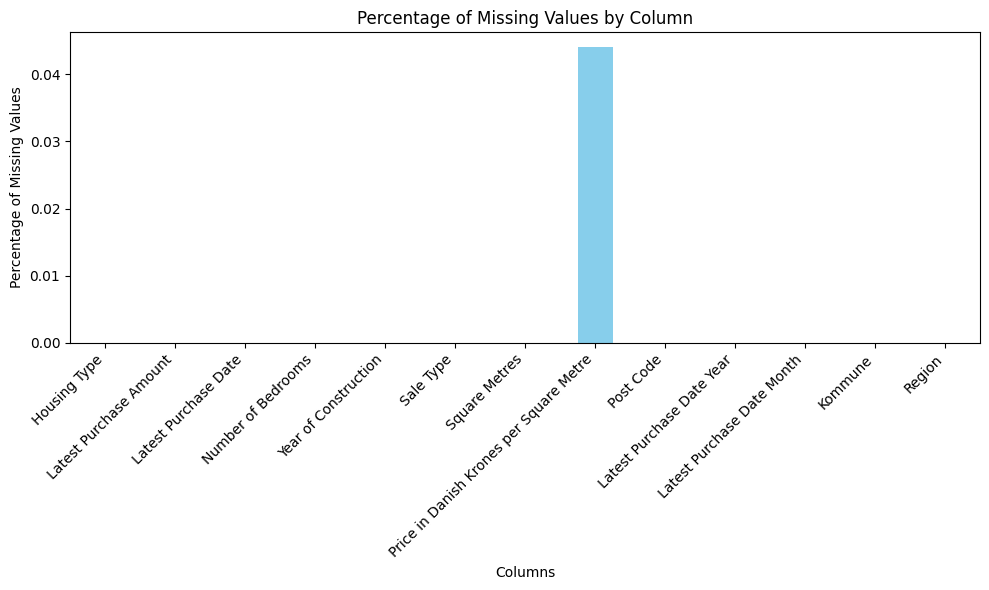

In [ ]:
#Check for missingness in the dataframe

import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Plot the percentage of missing values for each column
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#We may have some values that appear as 0's in our dataset, but should be treated as N/A.
#Let's check if thats the case with the code below.

import numpy as np

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is not "Number of Bedrooms" and replace 0 with NaN
    if column != "Number of Bedrooms":
        df[column] = df[column].replace(0, np.nan)

#Run the code from previous section to check.

#Year of construction has 2% of blanks, however since the missingness is not considered significant
#We will just drop the observations that have missing values.

#Same goes for Square Metres and Price in Danish Krones per Square Metre that have approx. 0.10% of missingness.

In [ ]:
# Remove observations with N/A values
df = df.dropna()

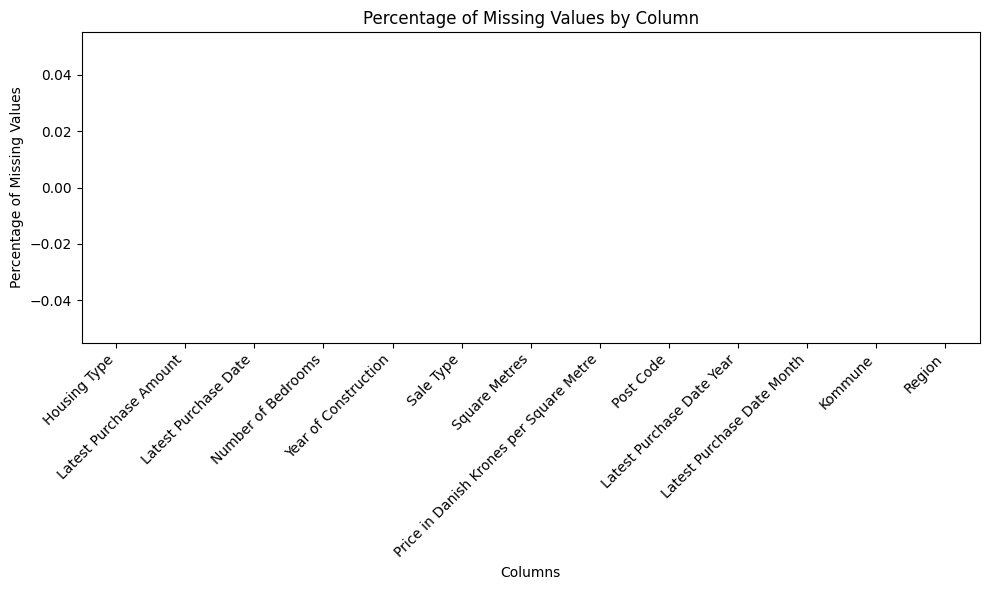

In [ ]:
#Double-check missingness

import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Plot the percentage of missing values for each column
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#We got 0% of missingness for all of our remaining observations! Nice :)

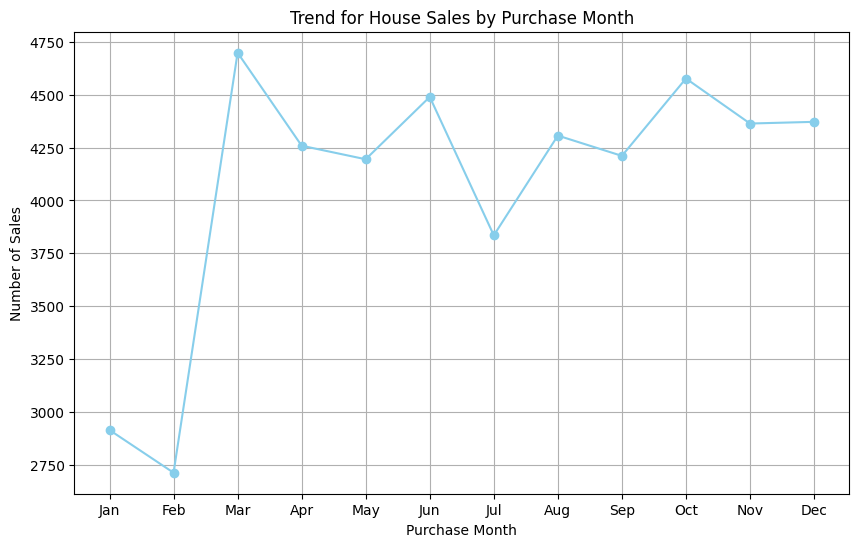

In [ ]:
#Looking for a trend in how people buy houses.

#Trend

import pandas as pd
import matplotlib.pyplot as plt

# Convert "Latest Purchase Date" to datetime if it's not already
df['Latest Purchase Date'] = pd.to_datetime(df['Latest Purchase Date'])

# Extract year and month from "Latest Purchase Date"
df['Purchase Year'] = df['Latest Purchase Date'].dt.year
df['Purchase Month'] = df['Latest Purchase Date'].dt.month

# Group by "Purchase Year" and "Purchase Month", and count the number of sales
sales_trend = df.groupby(['Purchase Year', 'Purchase Month']).size()

# Plot the trend
plt.figure(figsize=(12, 8))
sales_trend.unstack(level=0).plot(marker='o')
plt.title('Trend for House Sales by Purchase Year and Month')
plt.xlabel('Purchase Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Purchase Year')
plt.grid(True)
plt.show()




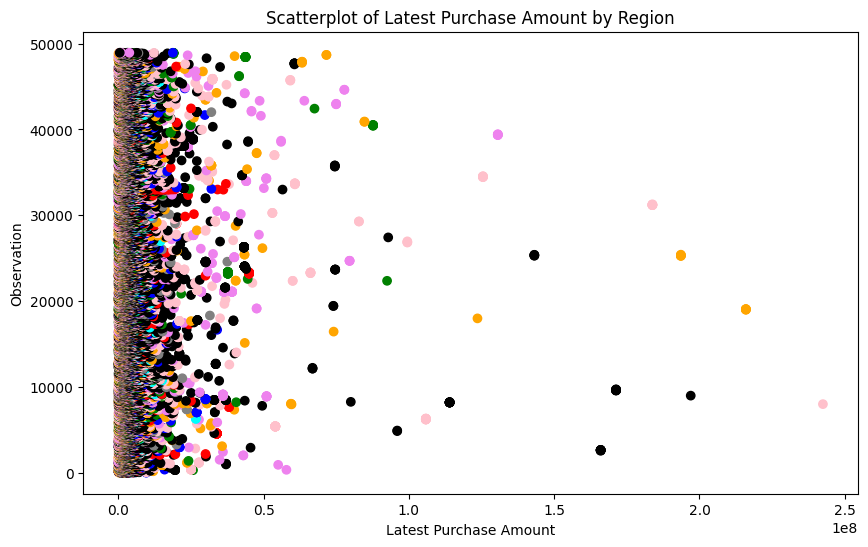

In [ ]:
#Scatterplot of prices by region

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Latest Purchase Amount' and 'Region'
# Replace 'data.csv' with the path to your data file if you're reading from a file

# Extracting columns
latest_purchase_amount = df['Latest Purchase Amount']
region = df['Region']

# Creating a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(latest_purchase_amount, range(len(df)), c=region.map({'Central Copenhagen': 'red', 'Fredriksberg': 'blue', 'Fyn': 'green', 'Middle Jutland': 'pink', 'North Jutland': 'orange', 'Oesterbro': 'grey', 'Sjaelland/Zealand': 'black', 'Southern Jutland': 'violet', 'Vesterbro': 'cyan'}))

# Adding labels and title
plt.xlabel('Latest Purchase Amount')
plt.ylabel('Observation')
plt.title('Scatterplot of Latest Purchase Amount by Region')


# Display the plot
plt.show()

#We need to filter out some values, it looks like a mess!!!!!!!

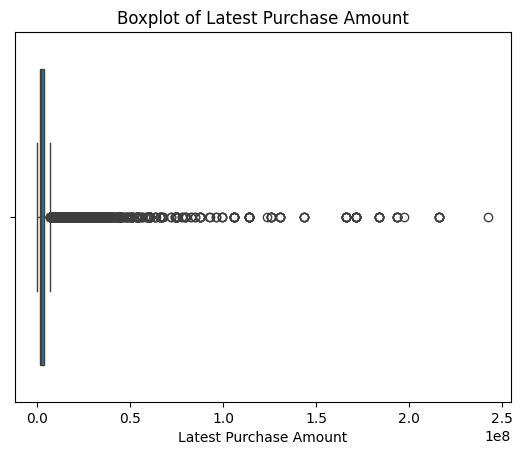

In [ ]:
#Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

# Access the "Latest Purchase Amount" column
latest_purchase_amount = df['Latest Purchase Amount']

# Create a boxplot
sns.boxplot(x=latest_purchase_amount)

# Set labels and title
plt.xlabel("Latest Purchase Amount")
plt.title("Boxplot of Latest Purchase Amount")

# Show the plot
plt.show()

In [ ]:
#Outlier identification

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Access the "Latest Purchase Amount" column
latest_purchase_amount = df['Latest Purchase Amount']

# Create a boxplot
sns.boxplot(x=latest_purchase_amount)

# Set labels and title
plt.xlabel("Latest Purchase Amount")
plt.title("Boxplot of Latest Purchase Amount")

# Calculate quartiles
Q1 = latest_purchase_amount.quantile(0.25)
Q3 = latest_purchase_amount.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = latest_purchase_amount[(latest_purchase_amount < lower_bound) | (latest_purchase_amount > upper_bound)]

# Mark outliers on the plot
plt.plot(outliers.index, outliers.values, 'ro', label='Outliers')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Print the outliers
print("Outliers:")
print(outliers)


# Count outliers
num_outliers = len(outliers)

# Print the count of outliers
print("Number of outliers:", num_outliers)

#Python suggested us 3660 observations as outliers, however when we look into the data ourselves we can see
#that it didn't classify the lowest values that should be outliers e.g., sale price of 50 DKK for the house
#to avoid excluding actual observations from the dataframe, we will instead filter out 5% of upper and lower
#sale price from the dataset. The code is below.

In [ ]:
#Filtering out lower and upper 5% of the data from the dataframe (which we consider as outliers)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Access the "Latest Purchase Amount" column
latest_purchase_amount = df['Latest Purchase Amount']

# Find the 5th percentile (5% lowest)
lowest_threshold = latest_purchase_amount.quantile(0.05)

# Find the 95th percentile (5% highest)
highest_threshold = latest_purchase_amount.quantile(0.95)

# Filter out the values within the range
filtered_df = df[(df['Latest Purchase Amount'] >= lowest_threshold) & (df['Latest Purchase Amount'] <= highest_threshold)]

# Create a boxplot with the 'Latest Purchase Amount' column from filtered_df
sns.boxplot(x='Latest Purchase Amount', data=filtered_df)

# Set labels and title
plt.xlabel("Filtered Latest Purchase Amount")
plt.title("Boxplot of Filtered Latest Purchase Amount")

# Show the plot
plt.show()

#As we can see, the boxplot looks much better than before. It stil classifies some observations as outliers
#However, we will not filter them out, as the prices seem more realistic than before.

In [ ]:
#Having taken care of the missing values as well as the outliers, we can save the new dataset for other
#study group members to use for modelling and analysis further :)

filtered_df.to_csv("data_for_modelling.csv", index=False)

In [ ]:
#Mean prices for different regions along the year

import pandas as pd
import matplotlib.pyplot as plt

# Convert "Latest Purchase Date" to datetime if it's not already
filtered_df['Latest Purchase Date'] = pd.to_datetime(filtered_df['Latest Purchase Date'])

# Extract year, month, and region from "Latest Purchase Date" and "Region"
filtered_df['Purchase Year'] = filtered_df['Latest Purchase Date'].dt.year
df['Purchase Month'] = filtered_df['Latest Purchase Date'].dt.month

# Group by "Purchase Year", "Purchase Month", and "Region", and calculate the mean of "Latest Purchase Amount"
mean_purchase_amount_by_region = filtered_df.groupby(['Purchase Year', 'Purchase Month', 'Region'])['Latest Purchase Amount'].mean().unstack()

# Plot the mean purchase amount trend for each region
plt.figure(figsize=(12, 8))
mean_purchase_amount_by_region.plot(marker='o', markersize=3)

# Format x-axis labels to include both year and month
x_labels = [f"{year}-{month}" for year, month in mean_purchase_amount_by_region.index]
plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right')

plt.title('Mean Purchase Amount by Region and Purchase Year-Month')
plt.xlabel('Purchase Year-Month')
plt.ylabel('Mean Purchase Amount')
plt.legend(title='Region', loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
#Total number of sales for different regions along the year

import pandas as pd
import matplotlib.pyplot as plt

# Convert "Latest Purchase Date" to datetime if it's not already
df['Latest Purchase Date'] = pd.to_datetime(df['Latest Purchase Date'])

# Extract year, month, and region from "Latest Purchase Date" and "Region"
df['Purchase Year'] = df['Latest Purchase Date'].dt.year
df['Purchase Month'] = df['Latest Purchase Date'].dt.month

# Group by "Purchase Year", "Purchase Month", and "Region", and count the number of sales
sales_count_by_region = df.groupby(['Purchase Year', 'Purchase Month', 'Region']).size().unstack()

# Plot the total number of sales trend for each region
plt.figure(figsize=(12, 8))
sales_count_by_region.plot(marker='o', markersize=5)

# Format x-axis labels to include both year and month
x_labels = [f"{year}-{month}" for year, month in sales_count_by_region.index]
plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right')

plt.title('Total Number of Sales by Region and Purchase Year-Month')
plt.xlabel('Purchase Year-Month')
plt.ylabel('Total Number of Sales')
plt.legend(title='Region', loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
#Histogram (compare it against df and filtered_df to see the impact of excluding outliers) :)
#So switch filtered_df to df to see the difference

import matplotlib.pyplot as plt

# Assuming your data is stored in a variable called 'df' with a column named 'Latest Purchase Price'

# Plot histogram without logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Latest Purchase Amount'], bins=300, color='skyblue', edgecolor='black', log=False)
plt.title('Histogram of Latest Purchase Price')
plt.xlabel('Latest Purchase Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
#Average Prices per Region

#Average Prices per Region

import pandas as pd

# Assuming your data is stored in a DataFrame called 'df' with columns 'Region' and 'Latest Purchase Price'

# Calculate average purchase price for each region
average_purchase_price_by_region = filtered_df.groupby('Region')['Latest Purchase Amount'].mean()

print(average_purchase_price_by_region)


In [ ]:
#Checking for Correlation using Correlation Matrix (only using numeric variables)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'filtered_df'

# Select the columns for correlation analysis
columns = ['Latest Purchase Amount', 'Square Metres', 'Price in Danish Krones per Square Metre', 'Number of Bedrooms']

# Calculate the correlation matrix
correlation_matrix = filtered_df[columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)



###Feature Engineering

In [ ]:
#Comparison of various normalization techniques

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Plotting histograms for 'Latest Purchase Amount' in filtered_df DataFrame

# Plot 1: Histogram of Latest Purchase Amount
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(filtered_df['Latest Purchase Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Latest Purchase Amount')
plt.xlabel('Latest Purchase Amount')
plt.ylabel('Frequency')

# Plot 2: Histogram with Log Transformation
plt.subplot(2, 2, 2)
plt.hist(np.log(filtered_df['Latest Purchase Amount'] + 1), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram with Log Transformation')
plt.xlabel('Log(Latest Purchase Amount + 1)')
plt.ylabel('Frequency')

# Plot 3: Histogram with Yeo-Johnson Transformation
yeo_johnson, _ = stats.yeojohnson(filtered_df['Latest Purchase Amount'])
plt.subplot(2, 2, 3)
plt.hist(yeo_johnson, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram with Yeo-Johnson Transformation')
plt.xlabel('Yeo-Johnson Transformed Latest Purchase Amount')
plt.ylabel('Frequency')

# Plot 4: Histogram with Box-Cox Transformation
boxcox, _ = stats.boxcox(filtered_df['Latest Purchase Amount'] + 1)
plt.subplot(2, 2, 4)
plt.hist(boxcox, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram with Box-Cox Transformation')
plt.xlabel('Box-Cox Transformed Latest Purchase Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
#Normalizing using BoxCox

import scipy.stats as stats

# Apply Box-Cox transformation to 'Latest Purchase Amount'
filtered_df['Normalized Purchase Amount'], _ = stats.boxcox(filtered_df['Latest Purchase Amount'] + 1)

# Display the first few rows of the DataFrame with the transformed variable
print(filtered_df[['Latest Purchase Amount', 'Normalized Purchase Amount']].head())

#Histogram to check the normalization
import matplotlib.pyplot as plt

# Plot histogram for the Box-Cox transformed variable
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['Normalized Purchase Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normalized Purchase Amount (Box-Cox Transformed)')
plt.xlabel('Normalized Purchase Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
#Merging values to bigger categories (categorical variables)

import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'filtered_df'

# Replace values for 'Region' and 'Sale Type'
filtered_df['Region'] = filtered_df['Region'].replace('Copenhagen', 'Capital Region')
filtered_df['Sale Type'] = filtered_df['Sale Type'].replace('Auktion', 'Andet')

# Find categorical columns
categorical_columns = filtered_df.select_dtypes(include=['object']).columns

# Plot bar charts for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    filtered_df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
#Saving as csv for modelling

filtered_df.to_csv('for_modelling.csv', index=False)

#Model development

In [ ]:
#Packages
import pandas as pd # for dataloading
from sklearn.model_selection import train_test_split # for datasplit
from sklearn.ensemble import RandomForestRegressor # for our randomForest regression
import numpy as np # general use
from sklearn.metrics import mean_squared_error #For general model assestment
from sklearn.tree import plot_tree # to plot Decision tree
import matplotlib.pyplot as plt # general plotting use
import statsmodels.api as sm # For OLS regression
from sklearn.model_selection import GridSearchCV # for KNN gridsearch
from sklearn.neighbors import KNeighborsRegressor # for KNN regression

In [ ]:
#loading dataset
df = pd.read_csv('House_listings.csv', sep=';')

In [ ]:
# check data types for our dataframe
for column in df.columns:
    column_type = type(df[column][0]) if len(df[column]) > 0 else "Empty"
    print(f"Column '{column}' has type: {column_type}")

In [ ]:
# We notify that Normalized purchase Amount needs to be a numeric feature.
# Replacing comma with period to allign for number format differencing
df['Normalized Purchase Amount'] = df['Normalized Purchase Amount'].str.replace(',', '.')

# Converting column to numeric
df['Normalized Purchase Amount'] = pd.to_numeric(df['Normalized Purchase Amount'])

# RANDOMFORREST REGRESSION

In [ ]:
# Specifying what data we want to use for our RandomForest
df_rf = df[['Housing Type','Sale Type', 'Number of Bedrooms', 'Year of Construction', 'Square Metres', 'Latest Purchase Amount', 'Region']]
# Post Code as a numeric feature cannot work in our models, which is why we remove it. But we still have Region as a geographical feature.

In [ ]:
# dummy encoding for categorical variables: Housing Type, Sale Type, Region
columns_to_encode = ['Housing Type', 'Sale Type', 'Region']
for column in columns_to_encode:
    df_rf.loc[:, column] = df_rf[column].astype('category')

# Creating dummy variables
df_rf_encoded = pd.get_dummies(df_rf, columns=columns_to_encode, dtype=int)

In [ ]:
# saving DataFrame
df_rf_encoded.to_csv('df_rf_encoded.csv', index=False)


In [ ]:
# Creating our dependent and independet variables. Where z is our dependent variable. Furthermore we create our test, and train dataset.
# Where we specify a test size of 0.3 of our population.
z = df_rf_encoded['Latest Purchase Amount']
B = df_rf_encoded.drop(['Latest Purchase Amount'], axis=1)
# Split the data into training and testing set
B_train_new, B_test_new, z_train_new, z_test_new = train_test_split(B, z, test_size=0.3, random_state=42)

In [ ]:
# We have previusly expirenced issues with our RandomForest regression. Since it makes the tree to complicated and unreadable. Therefore we specify max_depth of 5, and n_estimators to be 25
rf_model = RandomForestRegressor(n_estimators=25, max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
#Training our model
rf_model.fit(B_train_new, z_train_new)

In [ ]:
# Creating predictions for rf model
z_pred = rf_model.predict(B_test_new)

rmse = np.sqrt(mean_squared_error(z_test_new, z_pred))

print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
# Create plot over RandomForrest decision tree
tree_to_visualize = rf_model.estimators_[0]


plt.figure(figsize=(100, 10))
plot_tree(tree_to_visualize, feature_names=B_train_new.columns, filled=True, fontsize=10)

# Saving image
plt.savefig('Real_estateListings.png')
plt.show()

# OLS

In [ ]:
# creating dataframe
df_OLS = df[['Housing Type','Sale Type', 'Number of Bedrooms', 'Year of Construction', 'Square Metres','Normalized Purchase Amount', 'Region']]

In [ ]:
# dummy encoding for categorical variables: Housing Type, Sale Type, Region
columns_to_encode = ['Housing Type', 'Sale Type', 'Region']
for column in columns_to_encode:
    df_OLS.loc[:, column] = df_OLS[column].astype('category')

# Creating dummy variables
df_OLS_encoded = pd.get_dummies(df_OLS, columns=columns_to_encode, dtype=int)

In [ ]:
# Creating data and test dataset
y = df_OLS_encoded['Normalized Purchase Amount']
X = df_OLS_encoded.drop(['Normalized Purchase Amount'], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# First we want to specify which model we want to run: Here we use our train set, where y_train contains our independent variable.
model = sm.OLS(y_train, X_train)

# Fitting our specified model
result = model.fit()

# Achieving summary
print(result.summary())

In [ ]:
# Creating predictions for our OLS
OLS_pred = result.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - OLS_pred) ** 2))

print("Root Mean Squared Error:", rmse)

# KNN regression

In [ ]:
df_KNN = df[['Housing Type','Sale Type', 'Number of Bedrooms', 'Year of Construction', 'Square Metres', 'Latest Purchase Amount', 'Region']]

In [ ]:
# dummy encoding for categorical variables: Housing Type, Sale Type, Region
columns_to_encode = ['Housing Type', 'Sale Type', 'Region']
for column in columns_to_encode:
    df_KNN.loc[:, column] = df_KNN[column].astype('category')

# Creating dummy variables
df_KNN_encoded = pd.get_dummies(df_KNN, columns=columns_to_encode, dtype=int)

In [ ]:
# Creating data and test dataset
a = df_KNN_encoded['Latest Purchase Amount']
C = df_KNN_encoded.drop(['Latest Purchase Amount'], axis=1)
# Split the data into training and testing set
C_train, C_test, a_train, a_test = train_test_split(C, a, test_size=0.3, random_state=42)

In [ ]:
# Create a Hyperparameter grid, to better evaluate the best model. We choose the weights distance - since we want to value closer neighbors higher.
# the parameters grid also searches for the best model from first the first closest neighbor to the 11th closest neigbor
param_grid = {
    'n_neighbors': list(range(1, 11, 1)),
    'weights': ['distance']
}

In [ ]:
# Create the KNN model
knn_model = KNeighborsRegressor()

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10)

In [ ]:
# Fit the grid search to the training data
grid_search.fit(C_train, a_train)

In [ ]:
# achieving the best model
best_knn_model = grid_search.best_estimator_

In [ ]:
# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best RMSE score
print("Best RMSE:", -grid_search.best_score_)

In [ ]:
# Training KNN model_fit
knn_model.fit(C_train, a_train)

In [ ]:
# Predict on the test data
KNN_pred = knn_model.predict(X_test)
rmse = np.sqrt(np.mean((a_test - KNN_pred) ** 2))

print("Root Mean Squared Error:", rmse)

Model Deployment


In [ ]:
# Loading out new dataset, which consists of 20 new listings,
# which we are gonna calculate our forecasted price of. Based on our pretrained models

In [ ]:
df_new = pd.read_csv('Actual_actual_data.csv')

In [ ]:
for column in df_new.columns:
    column_type = type(df_new[column][0]) if len(df_new[column]) > 0 else "Empty"
    print(f"Column '{column}' has type: {column_type}")

In [ ]:
df_pred = df_new[['Housing Type','Sale Type', 'Number of Bedrooms', 'Year of Construction', 'Square Metres','Region']]

In [ ]:
# dummy encoding for categorical variables: Housing Type, Sale Type, Region
columns_to_encode = ['Housing Type', 'Sale Type', 'Region']
for column in columns_to_encode:
    df_pred.loc[:, column] = df_pred[column].astype('category')

# Creating dummy variables
df_pred_encoded = pd.get_dummies(df_pred, columns=columns_to_encode, dtype=int)

In [ ]:
# OLS prediction:
new_pred_OLS = result.predict(df_pred_encoded)
new_pred_OLS

In [ ]:
#KNN prediction
New_KNN_pred = knn_model.predict(df_pred_encoded)

In [ ]:
# RandomForrest prediction
new_randomforest_pred = rf_model.predict(df_pred_encoded)

In [ ]:
# Creating dataframe, and saving as csv for further comparison
predictions_df = pd.DataFrame({
    'RandomForest_Pred': new_randomforest_pred,
    'KNN_Pred': New_KNN_pred,
    'OLS_Pred': new_pred_OLS,
    'Latest_Purchase_Amount': df_new['Purchase Amount']
})

# Save the DataFrame as an csv file
predictions_df.to_csv('combined_predictions.csv', index=False)